In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


Part 1

1. Write code to read all SCE files and merge them into a single DataFrame.
2. Report the following statistics to get an idea of the sample size:
1. Number of unique individuals in the dataset.
2
2. Number of observations (rows) in the dataset.
3. Number of unique survey waves.
4. The first and last dates observed in the dataset

In [2]:
#read in files using glob library and for loop
files = glob.glob('../TECH2-GROUP-TERM-PAPER/data/*.csv')
dfs = []
for file in files:
    df = pd.read_csv(file, sep= ';', parse_dates = ['date'])
    dfs.append(df)
df = pd.concat(dfs, ignore_index = True)
df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70024705,201404,2014-04-03,1.0,0.0,3.0,23.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70024720,201404,2014-04-02,0.5,0.0,4.0,65.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70024744,201404,2014-04-02,0.6,0.0,4.0,52.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70024764,201404,2014-04-08,0.4,1.0,4.0,46.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70024781,201404,2014-04-10,0.8,1.0,3.0,61.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


In [3]:
print(f'number of uniqe induviduals:', df['userid'].nunique())
print(f'number of observations:', len(df))
print(f'number of suvey waves:',len(df['wid']))
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

number of uniqe induviduals: 23369
number of observations: 176101
number of suvey waves: 176101
The first date: 2013-06-01
The last date: 2024-12-31


Part 2

1. The numeracy questions are only asked the first time a respondent enters the survey and are
missing in subsequent waves. For each individual, fill in the missing numeracy variables
(num_lit_X_correct where X is a number) using the values from the first observation.
2. Drop all observations (rows) with missing values for the following variables:
1. Demographic information (gender, age, education)
2. The three expectations questions about inflation, house price changes, and the stock market
3. The seven numeracy questions (after you have forward-filled nonmissing values in step 1!)
Report the number of observations dropped at each step.
3. Drop outliers (implausibly small or large values). For each expectations response:
1. Compute the 0.1th percentile (0.001 quantile) and drop observations below this value.
2. Compute the 99.9th percentile (0.999 quantile) and drop observations above this value.
Report the number of observations dropped at each step.
4. Create a new column college equal to 1 if an individual has at least a bachelor’s degree, and 0
otherwise.
5. For each individual, compute the total number of correct numeracy responses and report the
fraction of individuals with 0, 1, . . . , 7 correct responses (e.g., 36.2% of individuals got all 7 right).
Create a new column num_lit_high (“high numerical literacy”) equal to 1 if an individual had
more correct responses than the median, and 0 otherwise.
6. Report the same sample statistics as in Part 1 for the final data set.

In [4]:

coll = [f'num_lit_q{n}' for n in (3,5,6,8,9)]
df[coll] = df.groupby('userid')[coll].transform('first')

# check if the values are replaced, it looks good
df[coll]
#only one value per question, meaning that I solved the problem

# Demographic variables (gender, education, age)

,num_lit_q3,num_lit_q5,num_lit_q6,num_lit_q8,num_lit_q9
0,10.0,100.0,5.0,NaN,NaN
1,10.0,100.0,5.0,NaN,NaN
2,10.0,100.0,500.0,NaN,NaN
3,10.0,100.0,5.0,NaN,NaN
4,10.0,100.0,5.0,NaN,NaN
...,...,...,...,...,...
176096,2.0,20.0,1.0,2.0,2.0
176097,10.0,1000.0,4.0,1.0,1.0
176098,100.0,100.0,5.0,3.0,2.0
176099,10.0,100.0,5.0,3.0,2.0


In [5]:
demog=['age', 'female', 'educ']#1
df[demog].isna().sum() # see that there are some missing values
exp_q=['inflation', 'house_price_change', 'prob_stocks_up'] #2.

#df[demog].isna().sum() #yey, I deleted all


In [6]:
# drop values

a=len(df)

df=df.dropna(subset=demog)

b=len(df)
print(f'Number of observations dropped when removing non-values for demographic variables (gender, education, age): {a-b}')

df=df.dropna(subset=exp_q)

c=len(df)
print(f'Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): {b-c}')

df=df.dropna(subset=coll)

d=len(df)
print(f'Number of observations dropped when removing non-values for the seven questions: {c-d}')

print(f'remaining observations:{len(df)}')
df


Number of observations dropped when removing non-values for demographic variables (gender, education, age): 868
Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): 1683
Number of observations dropped when removing non-values for the seven questions: 35899
remaining observations:137651


,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
2348,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0
2349,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2354,70057352,201504,2015-04-11,0.8,0.0,4.0,38.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2355,70057367,201504,2015-04-15,0.6,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2356,70057373,201504,2015-04-10,0.8,0.0,4.0,51.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


In [ ]:
lower_i= df['inflation'].quantile(0.001)
higher_i= df['inflation'].quantile(0.999)

lower_h= df['house_price_change'].quantile(0.001)
higher_h= df['house_price_change'].quantile(0.999)

lower_s= df['prob_stocks_up'].quantile(0.001)
higher_s= df['prob_stocks_up'].quantile(0.999)


df['inflation']=(df['inflation']>lower_i) & (df['inflation']< higher_i)
print(len(df))
df['house_price_change']=(df['house_price_change']>lower_h) & (df['house_price_change']< higher_h)
print(len(df))
df['prob_stocks_up']=(df['prob_stocks_up']>lower_s) & (df['prob_stocks_up']< higher_s)
print(len(df))

df['inflation']

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Part 3

With the processed data set in hand, you now turn to answering the governor’s first question: how do
expectations differ by gender, education, and numeracy?
For this part, perform the same analysis three times, each time splitting the sample by a different
variable:
1. Males vs. females
2. Non-college vs. college
3. Low vs. high numeracy

For each part,
1. Compute the average for each expectations variable (inflation, house prices, stock market) sepa-
rately for each group (males and females, non-college and college, etc.)
2. Create a figure with three panels (one per expectations variable) which depicts these group
averages as bar charts.
3
The complete analysis should produce three figures, each with three panels, each panel containing two
bars.

In [8]:
# lists
variables = ['inflation', 'house_price_change', 'prob_stocks_up']
genders = ["Male", 'Female']
figures = ['Inflation', 'House price change', 'Prob. Stocks up']
education = ['Not College Educated', 'College Educated']
numeracy_rate = ['High Numeracy', 'Low Numeracy']

In [9]:
# 1. average for each expectations variable
# Males Vs. Females

# Create a function to calculate and print the average variables 
df_gender = df.groupby(['female'])
def df_gender_calculation(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_gender[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Male', 1.0: 'Female'})
    variabledc = variable_average.to_dict()
    for key, value in variabledc.items(): 
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')
#use function for each variable

for i in range(len(variables)):
    df_gender_calculation(variable = variables[i])
    print(' ')



The average answer for INFLATION from the Male group is 1.0.
The average answer for INFLATION from the Female group is 1.0.
 
The average answer for HOUSE PRICE CHANGE from the Male group is 1.0.
The average answer for HOUSE PRICE CHANGE from the Female group is 1.0.
 
The average answer for PROB STOCKS UP from the Male group is 1.0.
The average answer for PROB STOCKS UP from the Female group is 1.0.
 


In [10]:
# non-college and college
df_college = df[df['educ']>2]
df_non_college= df[df['educ']<2]
# create a function to calculate and print the average variables
def df_college_calculation(variable):
    variable_neat = variable.replace('_', ' ').upper()
    df_educ ={}
    variable_averagec = round(df_college[variable].mean(), 1)
    variable_averagenc = round(df_non_college[variable].mean(),1)
    df_educ['college educated'] = variable_averagec
    df_educ['non college educated'] = variable_averagenc
    for key, value in df_educ.items():
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')

for i in range(len(variables)):
    df_college_calculation(variable = variables[i])
    print(' ')


The average answer for INFLATION from the college educated group is 1.0.
The average answer for INFLATION from the non college educated group is 1.0.
 
The average answer for HOUSE PRICE CHANGE from the college educated group is 1.0.
The average answer for HOUSE PRICE CHANGE from the non college educated group is 1.0.
 
The average answer for PROB STOCKS UP from the college educated group is 1.0.
The average answer for PROB STOCKS UP from the non college educated group is 1.0.
 


In [11]:
#low vs high numeracy
# calculate average numeracy for each person
columnsnum = ['num_lit_q1_correct',
 'num_lit_q2_correct',
 'num_lit_q3_correct',
 'num_lit_q5_correct',
 'num_lit_q6_correct',
 'num_lit_q8_correct',
 'num_lit_q9_correct']
df['Numeracy'] = df[columnsnum].mean(axis = 1)

#divide between high and low numeracy
df_high = df[df['Numeracy']>0.5]
df_low = df[df['Numeracy']<0.5]

#function to calculate average for each variable
def df_numeracy_calculation(variable):
    variable_neat = variable.replace('_', ' ').upper()
    df_num ={}
    variable_averageh = round(df_high[variable].mean(), 1)
    variable_averagel = round(df_low[variable].mean(),1)
    df_num['high numeracy'] = variable_averageh
    df_num['low numeracy'] = variable_averagel
    for key, value in df_num.items():
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')

# print functions
for i in range(len(variables)):
    df_numeracy_calculation(variable = variables[i])
    print(' ')


The average answer for INFLATION from the high numeracy group is 1.0.
The average answer for INFLATION from the low numeracy group is 1.0.
 
The average answer for HOUSE PRICE CHANGE from the high numeracy group is 1.0.
The average answer for HOUSE PRICE CHANGE from the low numeracy group is 1.0.
 
The average answer for PROB STOCKS UP from the high numeracy group is 1.0.
The average answer for PROB STOCKS UP from the low numeracy group is 1.0.
 


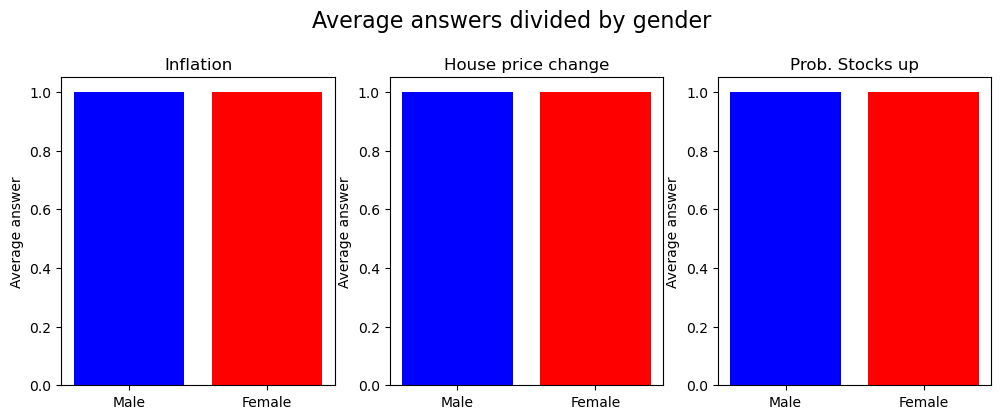

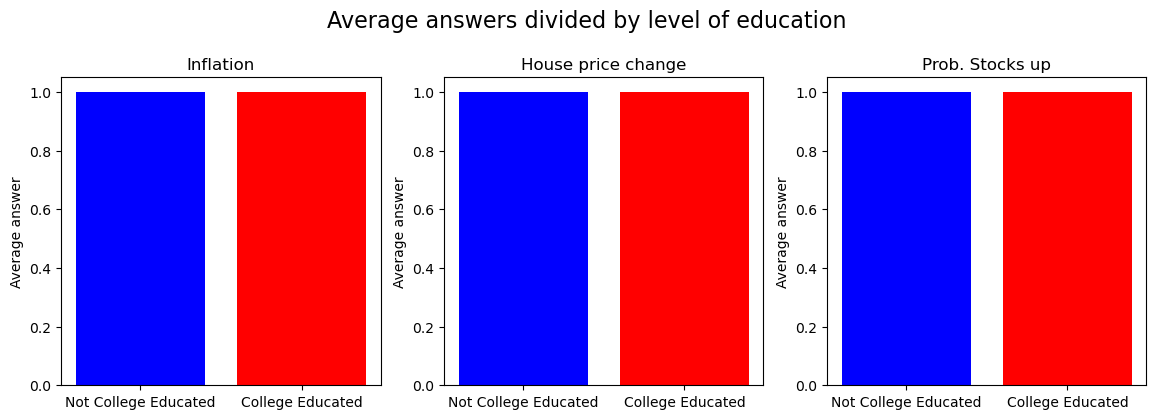

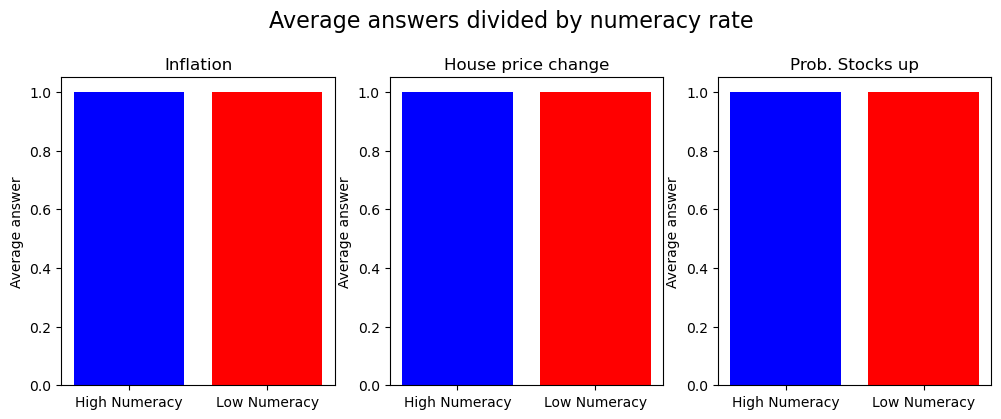

In [12]:
#Creating bar graphs

#Gender
#create function to return average for each variable
def df_gender_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_gender[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Male', 1.0: 'Female'})
    variabledc = variable_average.to_dict()
    return variabledc.values()

#create two lists for the titles and axes
genders = ["Male", 'Female']
figures = ['Inflation', 'House price change', 'Prob. Stocks up']
#plot figure
fig, axes = plt.subplots(1, 3,  figsize=(12, 4))
fig.suptitle('Average answers divided by gender', fontsize = 16, y = 1.05)
#loop to create three figures for each variable
c = 0
for i in range(len(variables)):
    avg = df_gender_dictionary(variable=variables[i])
    axes[c].bar(genders, avg, color = ['blue', 'red'])
    axes[c].set_title(figures[c])
    axes[c].set_ylabel('Average answer')
    
    c +=1


#College education
#create a function to return average values
def df_college_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    df_educ ={}
    variable_averagec = round(df_college[variable].mean(), 1)
    variable_averagenc = round(df_non_college[variable].mean(),1)
    df_educ['college educated'] = variable_averagec
    df_educ['non college educated'] = variable_averagenc
    return df_educ.values()
# create list for each level of education
education = ['Not College Educated', 'College Educated']
#plot figure
fig, axes = plt.subplots(1, 3,  figsize=(14, 4))
fig.suptitle('Average answers divided by level of education', fontsize = 16, y = 1.05)
#loop to create three figures for each variable
b = 0
for a in range(len(variables)):
    avg = df_college_dictionary(variable=variables[a])
    axes[b].bar(education, avg, color = ['blue', 'red'])
    axes[b].set_title(figures[b])
    axes[b].set_ylabel('Average answer')
    b+=1


# Numeracy rate
#create function to return averages
def df_numeracy_values(variable):
    variable_neat = variable.replace('_', ' ').upper()
    df_num ={}
    variable_averageh = round(df_high[variable].mean(), 1)
    variable_averagel = round(df_low[variable].mean(),1)
    df_num['high numeracy'] = variable_averageh
    df_num['low numeracy'] = variable_averagel
    return df_num.values()
# list for lables
numeracy_rate = ['High Numeracy', 'Low Numeracy']
#plot figure
fig, axes = plt.subplots(1, 3,  figsize=(12, 4))
fig.suptitle('Average answers divided by numeracy rate', fontsize = 16, y = 1.05)
#loop to create three figures for each variable
e = 0
for a in range(len(variables)):
    avg = df_numeracy_values(variable=variables[a])
    axes[e].bar(numeracy_rate, avg, color = ['blue', 'red'])
    axes[e].set_title(figures[e])
    axes[e].set_ylabel('Average answer')
    e+=1
       

Part 4

To answer the governor’s second set of questions, you need to investigate how average expectations
evolved over time for the period of 2015-2024 covered by the sample.
For each grouping variable (female, college, num_lit_high):
1. Collapse the data to monthly averages for each of the expectation variables (inflation, house prices,
stock market) for each group (e.g., for males vs. females).
2. Create a figure with three vertically stacked panels (one panel per expectation variable). Each
panel should show the group time series (two series per panel, e.g., males vs. females) with time
on the x-axis.
3. The governor wants to know how expectations reacted to important geopolitical events. Add
vertical lines and annotations to each panel indicating the following events:
• Trump elected US president for the first time (November 8, 2016)
• COVID-19 pandemic goes global (February 1, 2020)
• Biden elected US president (November 3, 2020)
• Russia’s full-scale invasion of Ukraine (February 24, 2022)
• Nobel Prize in Literature awarded to Jon Fosse (October 3, 2023)
• Trump elected US president for the second time (November 5, 2024)
Which events had sizeable effects on expectations? Can you detect differences in how different
groups adjusted their expectations?
The complete analysis should produce three figures, each with three panels, each panel containing two
lines

Part 5

Finally, the governor is interested in whether people’s expectations indicate realized future inflation or
simply reflect past inflation experienced when answering the survey.
To answer this question, you first need to obtain data on realized inflation. A colleague has already
downloaded data on the level of the Consumer Price Index (CPI) from FRED and stored it as a CSV file
in the data/ folder.
1. First, compare expectations to realized future inflation:
1. Using this monthly CPI data, compute the realized inflation over the next 12 months; i.e., for
each month t compute the forward-looking annual inflation as
In f lationt = CPIt+12 −CPIt
CPIt
×100
2. Merge this inflation measure with the monthly averages by gender from Part 4. Specifically,
match the average expected inflation by gender i in month t from the SCE, Ex pIn f lationit,
with the forward-looking inflation measure In f lationt from the CPI data.
3. Create a figure with two panels (one per gender), each showing a scatter plot of realized
future inflation (y-axis) versus average expected inflation by gender.
Compute the correlation between expected and realized inflation for each gender and add
the correlation coefficient as text to the corresponding panel.
4
2. Repeat steps 1–3, but instead of forward-looking inflation, compute realized inflation over the past
12 months:
In f lationt = CPIt −CPIt−12
CPIt−12
×100
Do you find differences in these correlation coefficients? What do these results say about how individuals
form beliefs about inflation? Are there notable gender differences?
Note: In this part, use monthly data only; individual-level SCE data is not needed.